# Basic Concept of Deep Learning

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline
plt.style.use("seaborn")

## Loading Datasets

In [3]:
df = pd.read_csv("data/pima_diabetes.csv", names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Shape: ", df.shape)
df.info()

Shape:  (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   preg_times      768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_press     768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   class           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


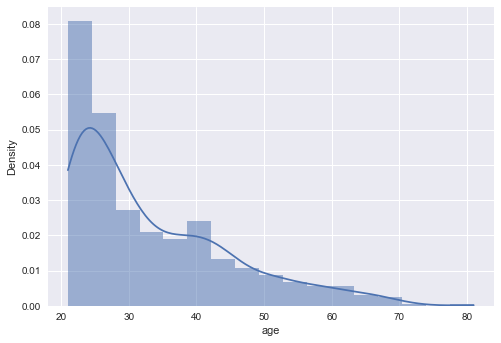

In [7]:
sns.histplot(df['age'], kde=True, stat='density', linewidth=0)
plt.show()

## Splitting Datasets

In [8]:
X = df.drop('class', axis=1)
y = df['class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Defining Model

In [10]:
model = Sequential()

# input layer, that's why input_dim has to be the same as the number of columns in X
# 1st hidden layer
# hidden layer usually uses relu activation function because it's proven to be the best function
model.add(Dense(12, input_dim=8, activation='relu'))

# 2nd hidden layer
model.add(Dense(8, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## Compiling Model

In [11]:
# compiling optimizer usually uses adam because it's proven to be the best optimizer
# we use binary_crossentropy because we have binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training Model

In [12]:
model.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
77/77 [==============================] - 3s 5ms/step - loss: 5.5901 - accuracy: 0.4984
Epoch 2/250
77/77 [==============================] - 0s 4ms/step - loss: 2.6184 - accuracy: 0.5033
Epoch 3/250
77/77 [==============================] - 0s 5ms/step - loss: 1.9830 - accuracy: 0.5342
Epoch 4/250
77/77 [==============================] - 0s 4ms/step - loss: 1.5098 - accuracy: 0.5717
Epoch 5/250
77/77 [==============================] - 0s 4ms/step - loss: 1.3648 - accuracy: 0.5342
Epoch 6/250
77/77 [==============================] - 0s 4ms/step - loss: 1.0883 - accuracy: 0.5798
Epoch 7/250
77/77 [==============================] - 0s 4ms/step - loss: 0.9745 - accuracy: 0.5765
Epoch 8/250
77/77 [==============================] - 0s 4ms/step - loss: 0.8740 - accuracy: 0.6124
Epoch 9/250
77/77 [==============================] - 0s 4ms/step - loss: 0.8252 - accuracy: 0.6221
Epoch 10/250
77/77 [==============================] - 0s 4ms/step - loss: 0.8098 - accuracy: 0.6173
Epoch 11/

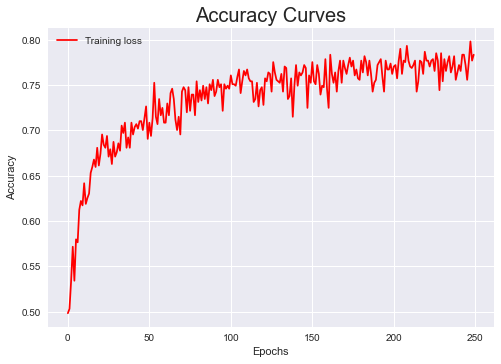

In [19]:
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves', fontsize=20)
plt.show()

## Evaluating Model

In [22]:
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7532467246055603
